# Let's divide users in gropus of interactions

In [1]:
from Utils.Toolkit import TestGen, TestSplit, DataReader, get_data
import numpy as np

data = get_data()
URM_all = data['URM_all'].tocsr()
target_users = data['target_users']

URM_train = data['train'].tocsr()
URM_test = data['test'].tocsr()

In [2]:
profile_length = np.ediff1d(URM_train.indptr)
profile_length[:10]

array([ 6,  5,  9,  0,  7, 35,  4,  3,  2, 13], dtype=int32)

In [3]:
block_size = int(len(profile_length)*0.05)
block_size

1545

In [4]:
sorted_users = np.argsort(profile_length)
sorted_users.shape

(30911,)

In [5]:
for group_id in range(0, 20):
    
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, average p.len {:.2f}, min {}, max {}".format(group_id, 
        users_in_group_p_len.mean(), users_in_group_p_len.min(), users_in_group_p_len.max()))

Group 0, average p.len 0.00, min 0, max 0
Group 1, average p.len 0.00, min 0, max 0
Group 2, average p.len 0.00, min 0, max 0
Group 3, average p.len 0.00, min 0, max 0
Group 4, average p.len 0.81, min 0, max 1
Group 5, average p.len 1.57, min 1, max 2
Group 6, average p.len 2.42, min 2, max 3
Group 7, average p.len 3.35, min 3, max 4
Group 8, average p.len 4.39, min 4, max 5
Group 9, average p.len 5.47, min 5, max 6
Group 10, average p.len 6.67, min 6, max 7
Group 11, average p.len 8.29, min 7, max 9
Group 12, average p.len 9.93, min 9, max 11
Group 13, average p.len 12.01, min 11, max 13
Group 14, average p.len 14.51, min 13, max 16
Group 15, average p.len 17.58, min 16, max 19
Group 16, average p.len 21.45, min 19, max 24
Group 17, average p.len 27.22, min 24, max 31
Group 18, average p.len 36.49, min 31, max 43
Group 19, average p.len 65.57, min 44, max 243


In [6]:
from CF.item_cf import ItemBasedCollaborativeFiltering
from CF.user_cf import UserBasedCollaborativeFiltering

itemCF = ItemBasedCollaborativeFiltering(topK=31, shrink=27)
itemCF.fit(URM_train)
userCF = UserBasedCollaborativeFiltering(topK=10, shrink=500)
userCF.fit(URM_train)

In [7]:
from Algorithms.SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from Algorithms.Base.Evaluation.Evaluator import EvaluatorHoldout
from Algorithms.Notebooks_utils.data_splitter import train_test_holdout


URM_train, URM_validation = train_test_holdout(URM_train, 0.85)
evaluator_validation_early_stopping = EvaluatorHoldout(URM_validation, cutoff_list=[10], exclude_seen=True)
recommender = SLIM_BPR_Cython(URM_train, verbose=False)
recommender.fit(topK=200,
                lambda_i=(10/100),
                lambda_j=(1/100),
                epochs = 300,
                validation_every_n = 50,
                stop_on_validation = True,
                evaluator_object = evaluator_validation_early_stopping,
                lower_validations_allowed = 10,
                validation_metric = "MAP"
        )

Unable to read memory status: list index out of range
SLIM_BPR_Recommender: Epoch 1 of 300. Elapsed time 0.06 sec
SLIM_BPR_Recommender: Epoch 2 of 300. Elapsed time 0.13 sec
SLIM_BPR_Recommender: Epoch 3 of 300. Elapsed time 0.19 sec
SLIM_BPR_Recommender: Epoch 4 of 300. Elapsed time 0.26 sec
SLIM_BPR_Recommender: Epoch 5 of 300. Elapsed time 0.32 sec
SLIM_BPR_Recommender: Epoch 6 of 300. Elapsed time 0.39 sec
SLIM_BPR_Recommender: Epoch 7 of 300. Elapsed time 0.45 sec
SLIM_BPR_Recommender: Epoch 8 of 300. Elapsed time 0.52 sec
SLIM_BPR_Recommender: Epoch 9 of 300. Elapsed time 0.58 sec
SLIM_BPR_Recommender: Epoch 10 of 300. Elapsed time 0.65 sec
SLIM_BPR_Recommender: Epoch 11 of 300. Elapsed time 0.72 sec
SLIM_BPR_Recommender: Epoch 12 of 300. Elapsed time 0.78 sec
SLIM_BPR_Recommender: Epoch 13 of 300. Elapsed time 0.85 sec
SLIM_BPR_Recommender: Epoch 14 of 300. Elapsed time 0.91 sec
SLIM_BPR_Recommender: Epoch 15 of 300. Elapsed time 0.97 sec
SLIM_BPR_Recommender: Epoch 16 of 300. E

SLIM_BPR_Recommender: Epoch 112 of 300. Elapsed time 47.44 sec
SLIM_BPR_Recommender: Epoch 113 of 300. Elapsed time 47.51 sec
SLIM_BPR_Recommender: Epoch 114 of 300. Elapsed time 47.58 sec
SLIM_BPR_Recommender: Epoch 115 of 300. Elapsed time 47.64 sec
SLIM_BPR_Recommender: Epoch 116 of 300. Elapsed time 47.71 sec
SLIM_BPR_Recommender: Epoch 117 of 300. Elapsed time 47.77 sec
SLIM_BPR_Recommender: Epoch 118 of 300. Elapsed time 47.84 sec
SLIM_BPR_Recommender: Epoch 119 of 300. Elapsed time 47.90 sec
SLIM_BPR_Recommender: Epoch 120 of 300. Elapsed time 47.97 sec
SLIM_BPR_Recommender: Epoch 121 of 300. Elapsed time 48.03 sec
SLIM_BPR_Recommender: Epoch 122 of 300. Elapsed time 48.10 sec
SLIM_BPR_Recommender: Epoch 123 of 300. Elapsed time 48.16 sec
SLIM_BPR_Recommender: Epoch 124 of 300. Elapsed time 48.23 sec
SLIM_BPR_Recommender: Epoch 125 of 300. Elapsed time 48.29 sec
SLIM_BPR_Recommender: Epoch 126 of 300. Elapsed time 48.36 sec
SLIM_BPR_Recommender: Epoch 127 of 300. Elapsed time 48

SLIM_BPR_Recommender: Epoch 223 of 300. Elapsed time 1.55 min
SLIM_BPR_Recommender: Epoch 224 of 300. Elapsed time 1.55 min
SLIM_BPR_Recommender: Epoch 225 of 300. Elapsed time 1.55 min
SLIM_BPR_Recommender: Epoch 226 of 300. Elapsed time 1.55 min
SLIM_BPR_Recommender: Epoch 227 of 300. Elapsed time 1.55 min
SLIM_BPR_Recommender: Epoch 228 of 300. Elapsed time 1.55 min
SLIM_BPR_Recommender: Epoch 229 of 300. Elapsed time 1.55 min
SLIM_BPR_Recommender: Epoch 230 of 300. Elapsed time 1.56 min
SLIM_BPR_Recommender: Epoch 231 of 300. Elapsed time 1.56 min
SLIM_BPR_Recommender: Epoch 232 of 300. Elapsed time 1.56 min
SLIM_BPR_Recommender: Epoch 233 of 300. Elapsed time 1.56 min
SLIM_BPR_Recommender: Epoch 234 of 300. Elapsed time 1.56 min
SLIM_BPR_Recommender: Epoch 235 of 300. Elapsed time 1.56 min
SLIM_BPR_Recommender: Epoch 236 of 300. Elapsed time 1.56 min
SLIM_BPR_Recommender: Epoch 237 of 300. Elapsed time 1.56 min
SLIM_BPR_Recommender: Epoch 238 of 300. Elapsed time 1.56 min
SLIM_BPR

In [8]:
from NonPersonalized.top_pop import TopPop

topPop = TopPop()
topPop.fit(URM_train)

In [9]:
from HYB.user_wise_hybrid import UserWiseHybridRecommender

hyb = UserWiseHybridRecommender()
hyb.set_shrink(27)
hyb.set_topK(31)
hyb.set_item_cf(itemCF)
hyb.fit(URM_train)

# Evaluate for different user groups

In [10]:
from Algorithms.Notebooks_utils.evaluation_function import evaluate_MAP_target_users

MAP_itemCF = []
MAP_userCF = []
MAP_SLIM = []
MAP_topPop = []
MAP_hyb = []

for group_id in range(0, 20):
    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))
    
    users_in_group = sorted_users[start_pos:end_pos]
    
    users_in_group_p_len = profile_length[users_in_group]
    
    print("Group {}, average p.len {:.2f}, min {}, max {}".format(group_id, 
        users_in_group_p_len.mean(), users_in_group_p_len.min(), users_in_group_p_len.max()))
    
    
    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert = True)
    users_not_in_group = sorted_users[users_not_in_group_flag]
    
    evaluate_map = evaluate_MAP_target_users(URM_test, itemCF, users_in_group, verbose=False)
    MAP_itemCF.append(evaluate_map)
    evaluate_map = evaluate_MAP_target_users(URM_test, userCF, users_in_group, verbose=False)
    MAP_userCF.append(evaluate_map)
    evaluate_map = evaluate_MAP_target_users(URM_test, recommender, users_in_group, verbose=False)
    MAP_SLIM.append(evaluate_map)
    evaluate_map = evaluate_MAP_target_users(URM_test, topPop, users_in_group, verbose=False)
    MAP_topPop.append(evaluate_map)
    evaluate_map = evaluate_MAP_target_users(URM_test, hyb, users_in_group, verbose=False)
    MAP_hyb.append(evaluate_map)

Group 0, average p.len 0.00, min 0, max 0
Group 1, average p.len 0.00, min 0, max 0
Group 2, average p.len 0.00, min 0, max 0
Group 3, average p.len 0.00, min 0, max 0
Group 4, average p.len 0.81, min 0, max 1
Group 5, average p.len 1.57, min 1, max 2
Group 6, average p.len 2.42, min 2, max 3
Group 7, average p.len 3.35, min 3, max 4
Group 8, average p.len 4.39, min 4, max 5
Group 9, average p.len 5.47, min 5, max 6
Group 10, average p.len 6.67, min 6, max 7
Group 11, average p.len 8.29, min 7, max 9
Group 12, average p.len 9.93, min 9, max 11
Group 13, average p.len 12.01, min 11, max 13
Group 14, average p.len 14.51, min 13, max 16
Group 15, average p.len 17.58, min 16, max 19
Group 16, average p.len 21.45, min 19, max 24
Group 17, average p.len 27.22, min 24, max 31
Group 18, average p.len 36.49, min 31, max 43
Group 19, average p.len 65.57, min 44, max 243


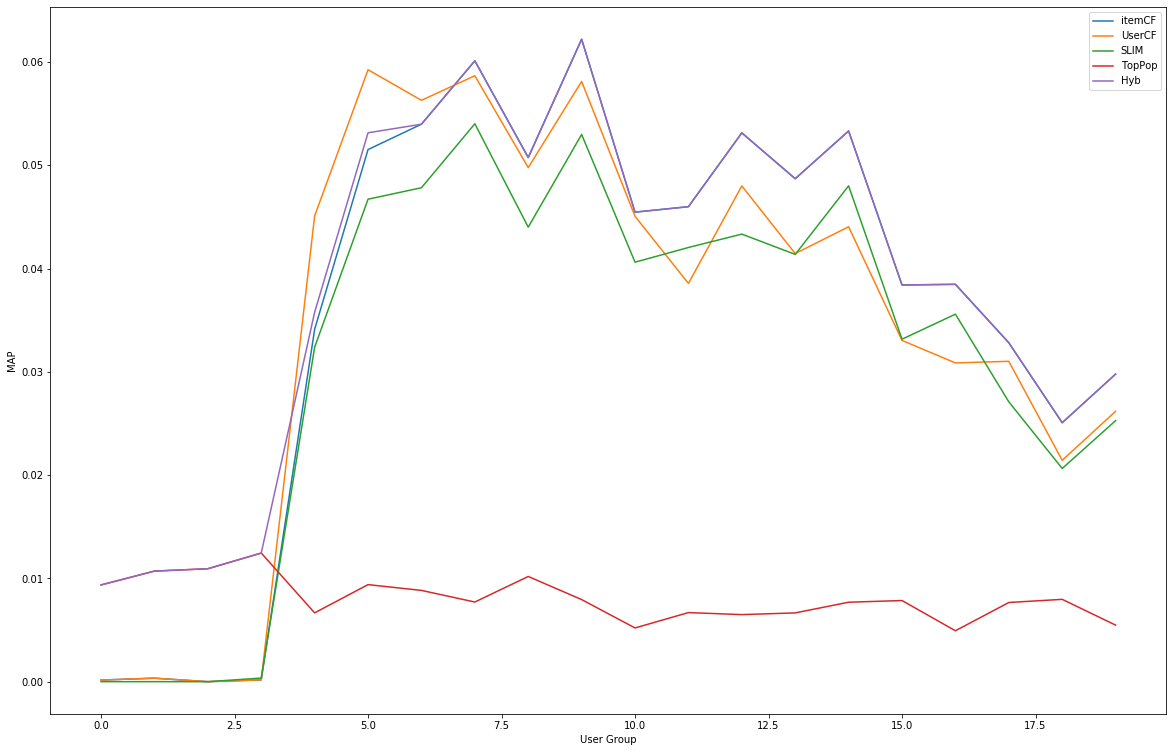

In [11]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.figure(figsize=(20,13))
pyplot.plot(MAP_itemCF, label="itemCF")
pyplot.plot(MAP_userCF, label="UserCF")
pyplot.plot(MAP_SLIM, label="SLIM")
pyplot.plot(MAP_topPop, label="TopPop")
pyplot.plot(MAP_hyb, label="Hyb")
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()